In [1]:
import torch

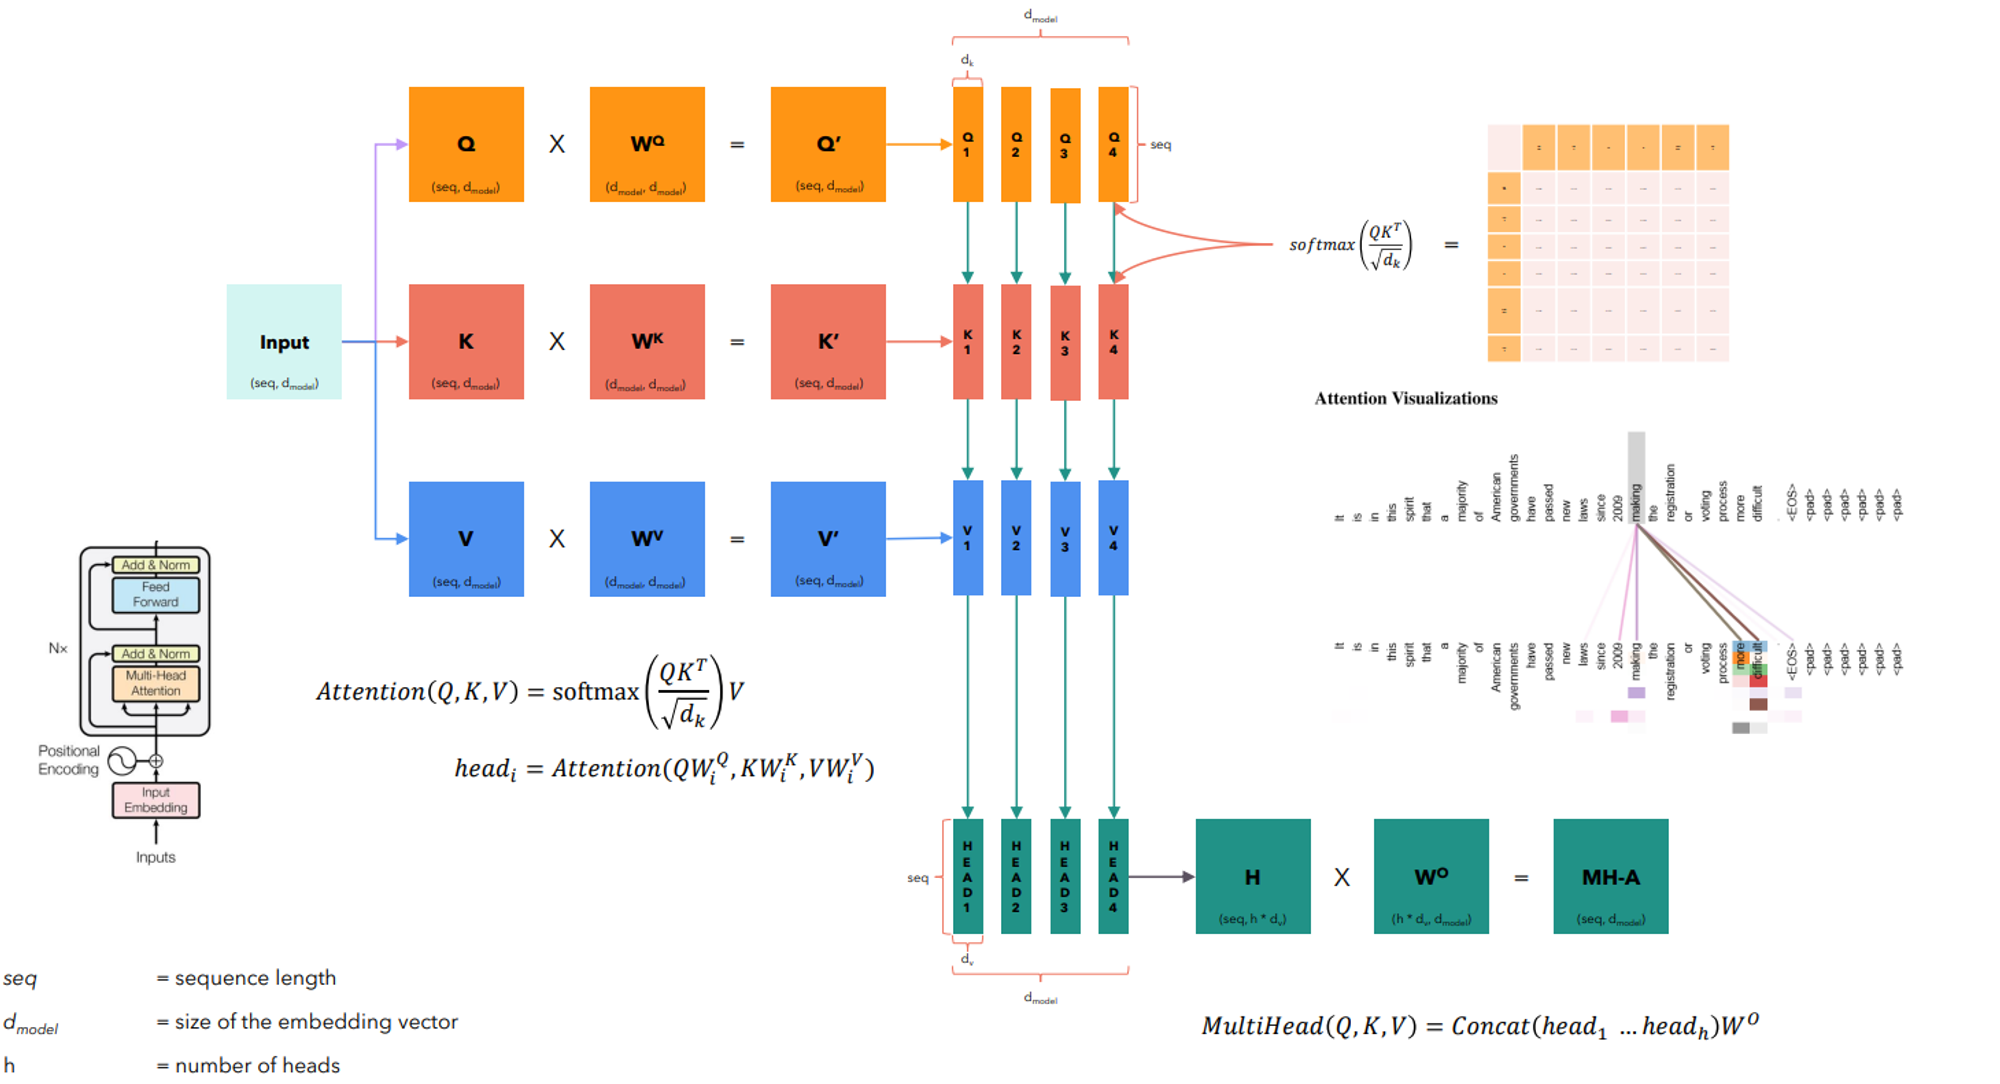

# Model tests

In [6]:
test_tensor = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
    [17, 18, 19, 20],
    [21, 22, 23, 24],
])
test_tensor.view(-1, 3).T

tensor([[ 1,  4,  7, 10, 13, 16, 19, 22],
        [ 2,  5,  8, 11, 14, 17, 20, 23],
        [ 3,  6,  9, 12, 15, 18, 21, 24]])

# Multihead attention realisation

In [7]:
class Attention(torch.nn.Module):
    def __init__(
        self, 
        emb_size,  # размер эмбэдингов
        n_heads  # число голов
    ):
        super(Attention, self).__init__()
        self.n_heads = n_heads
        self.wQ = torch.nn.parameter.Parameter(torch.rand([n_heads, emb_size, emb_size]))
        self.wK = torch.nn.parameter.Parameter(torch.rand([n_heads, emb_size, emb_size]))
        self.wV = torch.nn.parameter.Parameter(torch.rand([n_heads, emb_size, emb_size]))
        self.wO = torch.nn.parameter.Parameter(torch.rand([n_heads * emb_size, emb_size]))

    def forward(self, en_out):
        eo = en_out.clone()
        for i in range(eo.shape[0]):  # проходим по каждому элементу batch'а
            m = eo[i].unsqueeze(0)
            eo[i] = self.iteration(m, m, m)
        return eo

    def iteration(self, Q: torch.tensor, K: torch.tensor, V: torch.tensor):
        d = Q.shape[2]
        s = Q.shape[1]
        qp = Q.repeat(self.n_heads, 1, 1).bmm(self.wQ)  # повторяем мватрицу Q n_heads-раз и умножаем их на wQ
        kp = K.repeat(self.n_heads, 1, 1).bmm(self.wK)
        vp = V.repeat(self.n_heads, 1, 1).bmm(self.wV)
        res = torch.softmax(qp.bmm(kp.transpose(1, 2))/d**0.5, 1)
        res2 = (res.bmm(vp))
        return res2.view(s, d * self.n_heads).mm(self.wO)  # развёртываем attention'ы

att = Attention(7, 5)

In [12]:
data = torch.randn(3, 11, 7)
att(data).shape

torch.Size([3, 11, 7])